In [1]:
import numpy as np
import pandas as pd
import torch
import os
import matplotlib.pyplot as plt

import sys 
sys.path.append('..')
from tools import utils, amputation
from alternative_imputers import muzellec_imputers
from tools.utils import colors
from tqdm import tqdm

plt.style.use(utils.plot_style)

from tools import imputation

In [2]:
p_miss = [0.10]#, 0.40, 0.7]
modes = ['mae']#, 'bayesianRidge'],
mechas = ['MCAR', 'MAR', 'MNAR']
imputer_names = ['mf', 'mean', 'ice', 'knn', 'mice', 'linearRR']

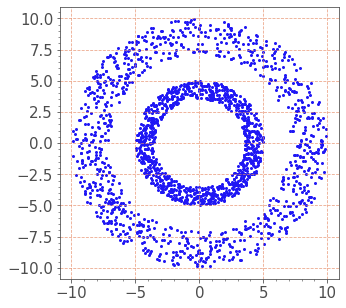

In [22]:
import matplotlib.pyplot as plt
import math
import random
fig, ax = plt.subplots(figsize=(5,5))
x = []
y = []
R = 10
for i in range(1000):
    theta = random.uniform(0,2*math.pi)
    r = random.uniform(R/2,R)
    x.append(math.sqrt(r*R)*math.cos(theta))
    y.append(math.sqrt(r*R)*math.sin(theta))

    
for i in range(1000):
    theta = random.uniform(0,2*math.pi)
    r = random.uniform(R/8,R/4)
    x.append(math.sqrt(r*R)*math.cos(theta))
    y.append(math.sqrt(r*R)*math.sin(theta))

dataset = np.vstack((x,y)).T
    
plt.scatter(x,y)
plt.show()



In [25]:
imputer_names = ['mice', 'knn', 'ice', 'mean', 'linearRR', 'midas']
p_miss = 0.4
mech = "MAR"
ncols = len(mechas)
datasets_miss_tot = []
imps_tot = []
for imputer_name in imputer_names:
    datasets_miss = []
    imps = []
    for mech in mechas:
        X_full, X_miss, mask, imp = imputation.impute(dataset, p_miss, mech, imputer_name)
        datasets_miss.append(X_miss)
        imps.append(imp)
    datasets_miss_tot.append(datasets_miss)
    imps_tot.append(imps)

Size index: [2]

Computation graph constructed

Model initialised



2022-04-16 21:10:13.010936: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch: 0 , loss: 3.9261584911346437
Epoch: 1 , loss: 2.770850254058838
Epoch: 2 , loss: 2.773663568973541
Epoch: 3 , loss: 2.803488415718079
Epoch: 4 , loss: 2.7243751001358034
Epoch: 5 , loss: 2.637119616031647
Epoch: 6 , loss: 2.6788276152610777
Epoch: 7 , loss: 2.7580137186050413
Epoch: 8 , loss: 2.7560287742614746
Epoch: 9 , loss: 2.80076740026474
Epoch: 10 , loss: 2.6914388628005983
Epoch: 11 , loss: 2.84207390499115
Epoch: 12 , loss: 2.734416143655777
Epoch: 13 , loss: 2.7881542572975158
Epoch: 14 , loss: 2.7413257875442505
Epoch: 15 , loss: 2.718417350292206
Epoch: 16 , loss: 2.812336304664612
Epoch: 17 , loss: 2.762102972507477
Epoch: 18 , loss: 2.76122199344635
Epoch: 19 , loss: 2.6244745740890503
Training complete. Saving file...
Model saved in file: tmp/MIDAS
INFO:tensorflow:Restoring parameters from tmp/MIDAS


INFO:tensorflow:Restoring parameters from tmp/MIDAS


Model restored.
Size index: [2]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 5.326808851242065
Epoch: 1 , loss: 3.917847545623779
Epoch: 2 , loss: 3.8354269485473633
Epoch: 3 , loss: 3.9277387943267823
Epoch: 4 , loss: 3.759266360282898
Epoch: 5 , loss: 3.739774803161621
Epoch: 6 , loss: 3.849259756088257
Epoch: 7 , loss: 3.826796284675598
Epoch: 8 , loss: 3.887199082374573
Epoch: 9 , loss: 3.8690078945159914
Epoch: 10 , loss: 3.7332192974090574
Epoch: 11 , loss: 4.017593481063843
Epoch: 12 , loss: 3.913706322669983
Epoch: 13 , loss: 3.9993483238220215
Epoch: 14 , loss: 3.9479341459274293
Epoch: 15 , loss: 3.8048923645019532
Epoch: 16 , loss: 3.9308271656036378
Epoch: 17 , loss: 3.8233180446624755
Epoch: 18 , loss: 3.7646390800476075
Epoch: 19 , loss: 3.7630994663238524
Training complete. Saving file...
Model saved in file: tmp/MIDAS
INFO:tensorflow:Restoring parameters from tmp/MIDAS


INFO:tensorflow:Restoring parameters from tmp/MIDAS


Model restored.
Size index: [2]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 3.895979246139526
Epoch: 1 , loss: 2.7851659903526307
Epoch: 2 , loss: 2.8276827812194822
Epoch: 3 , loss: 2.880065584182739
Epoch: 4 , loss: 2.712690059661865
Epoch: 5 , loss: 2.706341891288757
Epoch: 6 , loss: 2.6713400835990906
Epoch: 7 , loss: 2.70095609331131
Epoch: 8 , loss: 2.8086383934020995
Epoch: 9 , loss: 2.7120920238494874
Epoch: 10 , loss: 2.7152267436981203
Epoch: 11 , loss: 2.842474850654602
Epoch: 12 , loss: 2.7763679065704348
Epoch: 13 , loss: 2.853594533443451
Epoch: 14 , loss: 2.7326462535858154
Epoch: 15 , loss: 2.7019547662734986
Epoch: 16 , loss: 2.7061442012786867
Epoch: 17 , loss: 2.7884912576675416
Epoch: 18 , loss: 2.6560653190612795
Epoch: 19 , loss: 2.548623049736023
Training complete. Saving file...
Model saved in file: tmp/MIDAS
INFO:tensorflow:Restoring parameters from tmp/MIDAS


INFO:tensorflow:Restoring parameters from tmp/MIDAS


Model restored.


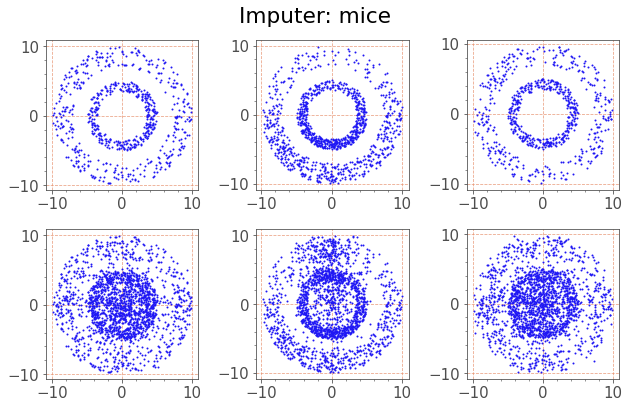

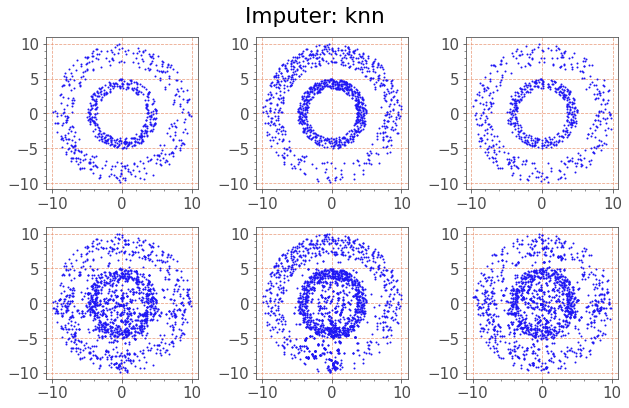

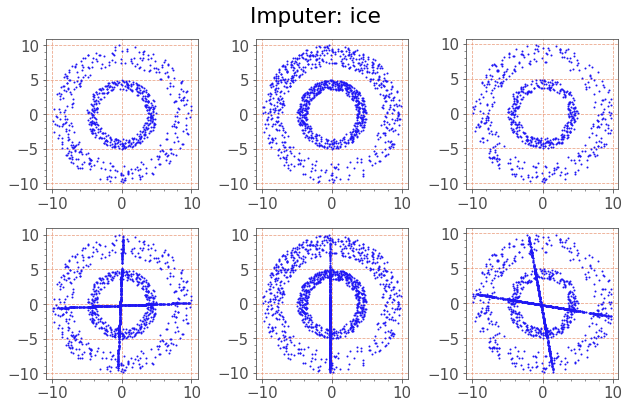

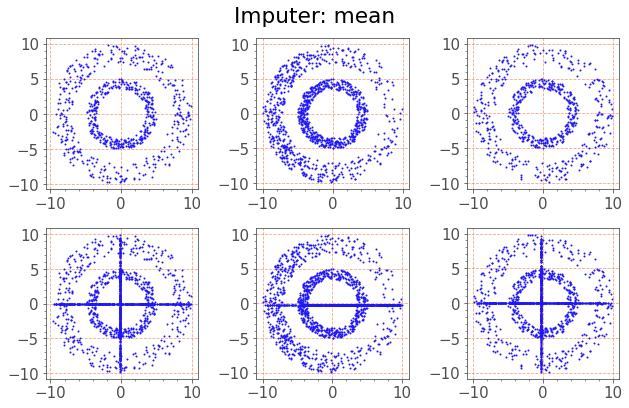

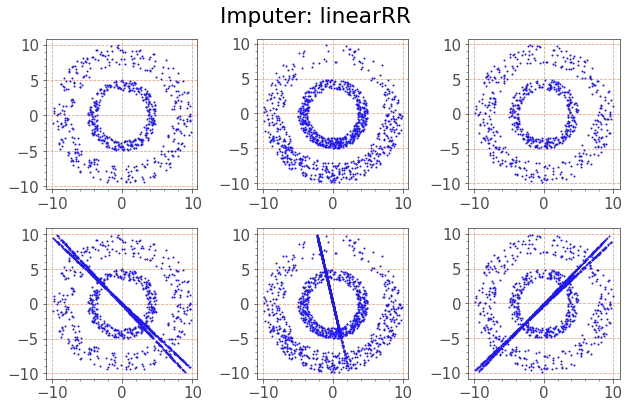

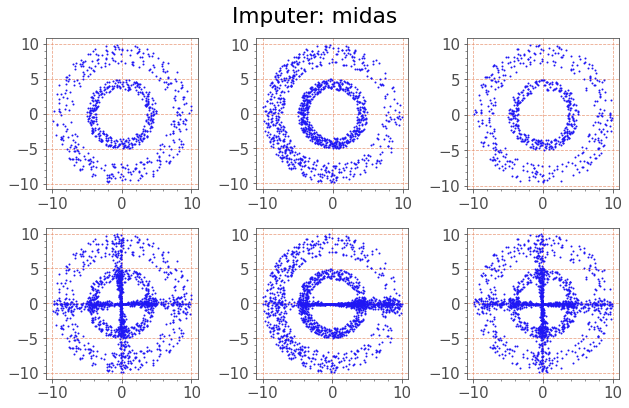

In [26]:
for idx, imputer_name in enumerate(imputer_names):
    fig, axs = plt.subplots(ncols=ncols, nrows = 2, figsize=(3*3,2 * 3))
    st = fig.suptitle(f"Imputer: {imputer_name}", fontsize="x-large")
    for i in range(ncols):
        axs[0][i].plot(datasets_miss_tot[idx][i][:,0],datasets_miss_tot[idx][i][:,1], 'o')
        axs[1][i].plot(imps_tot[idx][i][:,0],imps_tot[idx][i][:,1], 'o')
    st.set_y(0.95)
    fig.subplots_adjust(top=0.85)
    plt.savefig(f"figures/{mechas}, {np.array(p_miss)*100} %, impute: {imputer_name}.png", dpi=200)
    plt.tight_layout()